# Ekonometria Przestrzenna

Przeprowadzić analizę autokorelacji przestrzennej wybranej zmiennej. W badaniu uwzględnić
przedstawione na wykładzie miary autokorelacji przestrzennej. Na ich podstawie przeprowadzić
również testy istotności. Rozważyć różne wersje testów. W obliczeniach uwzględnić różne
macierze wag, np. wyznaczone na podstawie różnych macierzy sąsiedztwa, macierzy odległości
itp. Podać interpretację uzyskanych wyników.
Badanie przeprowadzić dla danych na poziomie województw i powiatów (razem oraz osobno dla
powiatów z dwóch wybranych województw).

In [ ]:
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 73.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/

In [ ]:
# 1. Importowanie bibliotek

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pysal.lib
from pysal.lib import weights
from pysal.explore import esda


/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:
# 2. Przygotowanie danych

wojewodztwa = gpd.read_file("wojewodztwa/wojewodztwa.shp")
daneWoj = pd.read_csv("daneWoj.csv")

wojewodztwa['wojewodztwo'] = wojewodztwa['JPT_NAZWA_'].str.lower()  # Kolumna z nazwami województw w shapefile
daneWoj['wojewodztwo'] = daneWoj['województwo'].str.lower()    # Kolumna z CSV
wojewodztwa = wojewodztwa.merge(daneWoj, on='wojewodztwo')

wojewodztwa.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,RODZAJ,geometry,wojewodztwo,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Odpady zebrane w ciągu roku|ogółem w tys. ton
0,None,WOJ,2289315,32,zachodniopomorskie,None,0,20220613,0,20120926,...,wojewodztwo,"POLYGON ((188256.168 683730.875, 189761.898 68...",zachodniopomorskie,6,23200000000,zachodniopomorskie,22907.0,2022,32,676.96
1,None,WOJ,1398751,08,lubuskie,None,0,20211210,0,20120926,...,wojewodztwo,"POLYGON ((249058.528 411232.826, 249030.522 41...",lubuskie,4,20800000000,lubuskie,13988.0,2022,8,391.14
2,None,WOJ,1994777,02,dolnośląskie,None,0,20221019,0,20120926,...,wojewodztwo,"POLYGON ((351910.997 289041.305, 351818.002 28...",dolnośląskie,7,30200000000,dolnośląskie,19947.0,2022,2,1220.22
3,None,WOJ,2982700,30,wielkopolskie,None,0,20220330,0,20120926,...,wojewodztwo,"POLYGON ((441690.785 515930.957, 441724.727 51...",wielkopolskie,5,23000000000,wielkopolskie,29827.0,2022,30,1331.13
4,None,WOJ,1831001,22,pomorskie,None,0,20220906,0,20120926,...,wojewodztwo,"POLYGON ((488665.467 751328.589, 488780.891 75...",pomorskie,10,42200000000,pomorskie,18336.0,2022,22,903.98


# Autokorelacja przestrzenna

w użytych testach mamy następujace hipotezy:

Hipotezy:

𝐻0 : Brak autokorelacji przestrzennej


H1 : Istnieje autokorelacja przestrzenna


In [ ]:
# 3. Tworzenie macierzy wag przestrzennych
w = weights.Queen.from_dataframe(wojewodztwa)
w.transform = 'R'  # Normalizacja macierzy wag


<ipython-input-5-7beab24731ae>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(wojewodztwa)


In [ ]:
# 4. Wyodrębnienie wartości zmiennej
y = wojewodztwa['Odpady zebrane w ciągu roku|ogółem w tys. ton'].values


In [ ]:
# 5. Obliczenie wskaźnika Morana
moran = esda.Moran(y, w)

print('Wskaźnik Morana I:', moran.I)
print('Statystyka z:', moran.z_norm)
print('p-value:', moran.p_norm)


Wskaźnik Morana I: -0.29494410674958277
Statystyka z: -1.5346937902035942
p-value: 0.12485906191611987


In [ ]:
# 6. Obliczenie wskaźnika Geary'ego
geary = esda.Geary(y, w)

print('Wskaźnik Geary\'ego C:', geary.C)
print('Statystyka z:', geary.z_norm)
print('p-value:', geary.p_norm)


Wskaźnik Geary'ego C: 1.2736093887115443
Statystyka z: 1.8208863903188468
p-value: 0.03431206420540975


In [ ]:
# 7. Obliczenie statystyki Getisa i Orda G
G = esda.G(y, w)

print('Statystyka G Getisa i Orda:', G.G)
print('Statystyka z:', G.z_norm)
print('p-value:', G.p_norm)


Statystyka G Getisa i Orda: 0.29029858981786816
Statystyka z: 0.23627946059469418
p-value: 0.4066079119212024


8. Interpretacja wyników

- Wskaźnik Morana I: wartości bliskie 1 wskazują na silną pozytywną autokorelację przestrzenną, wartości bliskie -1 na silną negatywną autokorelację, a wartości bliskie 0 sugerują brak autokorelacji.

- Wskaźnik Geary'ego C: wartości mniejsze niż 1 wskazują na pozytywną autokorelację, a wartości większe niż 1 na negatywną autokorelację.

- Wskaźnik G Getisa i Orda: wysokie wartości wskazują na skupiska wysokich wartości zmiennej, a niskie na skupiska niskich wartości.


W naszym przypadku wartości statystyk wynosiły:

- Morana I: -0.29494410674958277
Statystyka z: -1.5346937902035942
p-value: 0.12485906191611987

- Geary'ego C: 1.2736093887115443
Statystyka z: 1.8208863903188468
p-value: 0.03431206420540975

- G Getisa i Orda: 0.29029858981786816
Statystyka z: 0.23627946059469418
p-value: 0.4066079119212024


Podsumowując wyniki: wskaźnik Morana I wskazuje na brak istotnej autokorelacji przestrzennej dla odpadów komunalnych między województwami. Wskaźnik Geary'ego C sugeruje pewną negatywną autokorelację, co oznacza różnice w poziomie zmiennej między sąsiadującymi województwami, jednak jest ona słaba. Z kolei wskaźnik G Getisa i Orda nie wykazał obecności wyraźnych skupisk wysokich ani niskich wartości zmiennej w badanych regionach.

Podsumowujac nie ma silnych przestrzennych wzorców autokorelacji w danych o odpadach komunalnych między województwami. Brak istotnej pozytywnej autokorelacji wskazuje, że sąsiednie województwa nie mają wyraźnie podobnych poziomów tej zmiennej. Natomiast wyniki Geary'ego C sugerują umiarkowaną tendencję do różnic między województwami, co może oznaczać, że poziom gospodarki odpadami zależy bardziej od lokalnych czynników niż od wzajemnych wpływów przestrzennych. Brak skupisk potwierdzony wskaźnikiem G Getisa i Orda dodatkowo wspiera wniosek, że zarządzanie odpadami w regionach jest raczej zróżnicowane i nie tworzy wyraźnych, sąsiadujących ze sobą "stref" o podobnych wartościach.

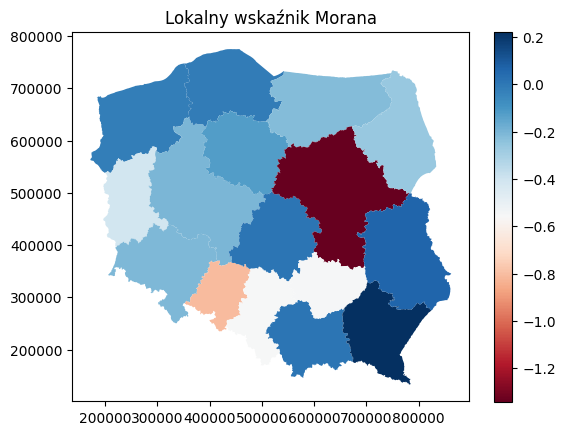

In [ ]:
# 9. Wizualizacja wyników

# Obliczenie lokalnego wskaźnika Morana
lm = esda.Moran_Local(y, w)

# Dodanie wyników do GeoDataFrame
wojewodztwa['local_moran'] = lm.Is

# Wizualizacja
wojewodztwa.plot(column='local_moran', cmap='RdBu', legend=True)
plt.title('Lokalny wskaźnik Morana')
plt.show()


# Autokorelacja przestrzenna z permutacjami


In [ ]:
# Obliczenie wskaźnika Morana I z permutacjami
moran_perm = esda.Moran(y, w, permutations=999)

print('Wskaźnik Morana I:', moran_perm.I)
print('p-value (permutacje):', moran_perm.p_sim)
print('Z-score (permutacje):', moran_perm.z_sim)


Wskaźnik Morana I: -0.29494410674958277
p-value (permutacje): 0.043
Z-score (permutacje): -1.5531629492238848


In [ ]:
# Geary's C z permutacjami
geary_perm = esda.Geary(y, w, permutations=999)
print('Wskaźnik Geary\'ego C:', geary_perm.C)
print('p-value (permutacje):', geary_perm.p_sim)

Wskaźnik Geary'ego C: 1.2736093887115443
p-value (permutacje): 0.025


In [ ]:
# Getis and Ord's G z permutacjami
G_perm = esda.G(y, w, permutations=999)
print('Statystyka G Getisa i Orda:', G_perm.G)
print('p-value (permutacje):', G_perm.p_sim)

Statystyka G Getisa i Orda: 0.29029858981786816
p-value (permutacje): 0.412


Wskaźnik Morana I: Uzyskana wartość -0.2949 z p-value 0.043 wskazuje na słabą, lecz istotną statystycznie negatywną autokorelację przestrzenną na poziomie 0.05, co sugeruje dywersyfikację między sąsiadującymi województwami.

Wskaźnik Geary'ego C: Wynik 1.2736 z p-value 0.025 również potwierdza negatywną autokorelację, wskazując na wyraźne różnice między sąsiadującymi województwami i silny wpływ czynników lokalnych.

Statystyka G Getisa i Orda: Wartość 0.2903 oraz p-value 0.412 sugerują brak istotnych skupisk, wskazując na losowe rozmieszczenie wartości zmiennej.

Podsumowanie: Testy z permutacjami wskazują na brak silnej autokorelacji przestrzennej w badanych danych, a różnice między województwami są bardziej zróżnicowane przestrzennie niż wzajemnie zależne.

**Podsumowanie**

Testy z permutacjami zmieniły znaczenie wyników w przypadku wskaźników Morana I i Geary'ego C, zwiększając ich istotność, podczas gdy wynik testu G Getisa i Orda pozostał niezmieniony. Permutacje okazały się więc szczególnie pomocne w uwzględnieniu niepewności przy określaniu autokorelacji przestrzennej.

Finalna konkluzja dotycząca autokorelacji przestrzennej wskazuje na obecność umiarkowanej, istotnej statystycznie negatywnej autokorelacji przestrzennej w danych o odpadach komunalnych między województwami.

# Korelogram i wykres rozproszenia

/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:131: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn(


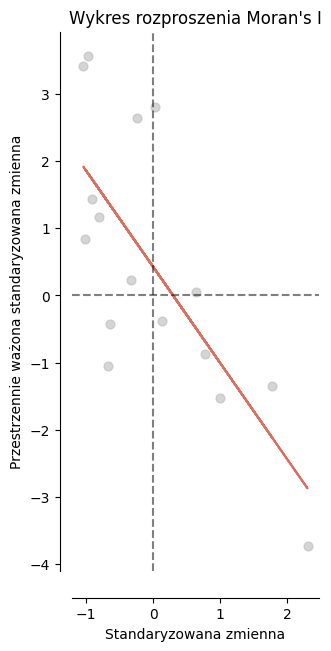

In [ ]:
from splot.esda import moran_scatterplot

# Standaryzacja zmiennej
y_std = (y - y.mean()) / y.std()

# Wykres rozproszenia
fig, ax = moran_scatterplot(moran_perm, p=0.05)
ax.set_xlabel('Standaryzowana zmienna')
ax.set_ylabel('Przestrzennie ważona standaryzowana zmienna')
plt.title('Wykres rozproszenia Moran\'s I')
plt.show()


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


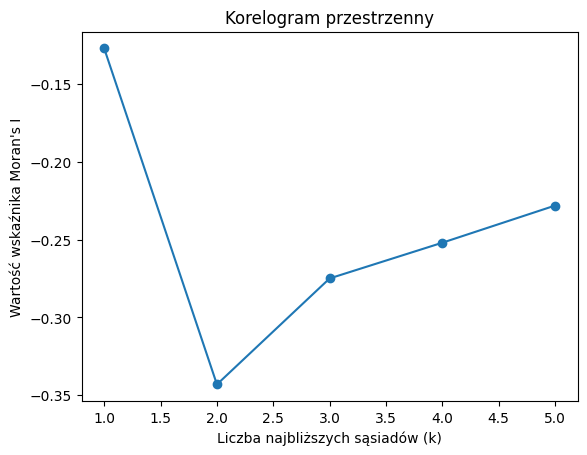

In [ ]:
# Tworzenie macierzy wag opartych na odległości
max_dist = 500000  # Maksymalna odległość (w metrach)
w_dist = weights.DistanceBand.from_dataframe(wojewodztwa, threshold=max_dist, binary=True)

# Obliczenie autokorelacji dla różnych odległości
lags = range(1, 6)
moran_stats = []

for lag in lags:
    w_lag = weights.KNN.from_dataframe(wojewodztwa, k=lag)
    w_lag.transform = 'R'
    moran_lag = esda.Moran(y, w_lag, permutations=999)
    moran_stats.append(moran_lag.I)

# Wykres korelogramu
plt.plot(lags, moran_stats, marker='o')
plt.title('Korelogram przestrzenny')
plt.xlabel('Liczba najbliższych sąsiadów (k)')
plt.ylabel('Wartość wskaźnika Moran\'s I')
plt.show()


Korelogram przestrzenny dla wskaźnika Morana I wskazuje, że przy jednym najbliższym sąsiedzie wartość autokorelacji jest bliska zeru, co oznacza niewielkie podobieństwo lub różnice między sąsiadującymi województwami. Najbardziej ujemna autokorelacja występuje jednak przy dwóch sąsiadach, co sugeruje, że na tym dystansie województwa wykazują największe zróżnicowanie w zakresie badanej zmiennej (gospodarka odpadami). W miarę dalszego zwiększania liczby sąsiadów (lagów) autokorelacja stopniowo wzrasta, zbliżając się do zera, co oznacza zmniejszające się zróżnicowanie między regionami na większych odległościach. Wynik ten wskazuje na dominację lokalnych czynników w zarządzaniu odpadami, przy czym różnice są najbardziej widoczne na poziomie bliskich sąsiadów.

In [ ]:
# Macierz sąsiedztwa Rook
w_rook = weights.Rook.from_dataframe(wojewodztwa)
w_rook.transform = 'R'


<ipython-input-16-6d0c8d8619e5>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = weights.Rook.from_dataframe(wojewodztwa)


In [ ]:
# Macierz odległości z progiem
max_distance = 500000  # 500 km
w_distance = weights.DistanceBand.from_dataframe(wojewodztwa, threshold=max_distance)
w_distance.transform = 'R'


In [ ]:
# Macierz kNN z k=4
w_knn = weights.KNN.from_dataframe(wojewodztwa, k=4)
w_knn.transform = 'R'


In [ ]:
# Lista macierzy wag i ich nazw
weights_list = [(w, 'Macierz wag przestrzennych Queen'), (w_rook, 'Rook'), (w_distance, 'Macierz odleglosci z progiem'), (w_knn, 'Macierz KNN (k=4)')]

for w_matrix, name in weights_list:
    moran_temp = esda.Moran(y, w_matrix, permutations=999)
    print(f'Macierz wag: {name}')
    print(f'  Wskaźnik Morana I: {moran_temp.I:.4f}')
    print(f'  p-value (permutacje): {moran_temp.p_sim:.4f}')
    print('---------------------------------------')


Macierz wag: Macierz wag przestrzennych Queen
  Wskaźnik Morana I: -0.2949
  p-value (permutacje): 0.0440
---------------------------------------
Macierz wag: Rook
  Wskaźnik Morana I: -0.2949
  p-value (permutacje): 0.0370
---------------------------------------
Macierz wag: Macierz odleglosci z progiem
  Wskaźnik Morana I: -0.0859
  p-value (permutacje): 0.2000
---------------------------------------
Macierz wag: Macierz KNN (k=4)
  Wskaźnik Morana I: -0.2520
  p-value (permutacje): 0.0700
---------------------------------------


Analiza autokorelacji przestrzennej dla różnych macierzy wag wykazuje różnice w sile i istotności wyników. Zarówno macierz Queen, jak i Rook wskazują na umiarkowaną, istotną statystycznie negatywną autokorelację, co sugeruje duże zróżnicowanie między sąsiadującymi województwami w zarządzaniu odpadami. W przypadku macierzy odległości i KNN autokorelacja jest słabsza i nieistotna, co oznacza, że wraz ze wzrostem odległości przestrzennej zależności te się rozmywają. Wskazuje to na dominację lokalnych różnic wśród sąsiadujących województw, natomiast większe dystanse osłabiają te zależności.